# E-Retail Company Data Analytics

This project is aimed to walk through the complete workflow of a machine learning project; from data wrangling, exploratory data analysis (EDA), model training and model evaluation/comparison. 


## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

In [1]:
import os
import pandas as pd
import numpy as np


os.listdir("./data")

['Orders.csv', '.DS_Store', 'Returns.csv']

In [2]:
print("Reading in the CSV data files")
orders_df = pd.read_csv("./data/Orders.csv")
returns_df = pd.read_csv("./data/Returns.csv")

Reading in the CSV data files


In [3]:
# Checking Columns/Fearture Set

orders_df.head(3).T

,0,1,2
Row.ID,40098,26341,25330
Order.ID,CA-2014-AB10015140-41954,IN-2014-JR162107-41675,IN-2014-CR127307-41929
Order.Date,11/11/14,2/5/14,10/17/14
Ship.Date,11/13/14,2/7/14,10/18/14
Ship.Mode,First Class,Second Class,First Class
Customer.ID,AB-100151402,JR-162107,CR-127307
Customer.Name,Aaron Bergman,Justin Ritter,Craig Reiter
Segment,Consumer,Corporate,Consumer
Postal.Code,73120.0,NaN,NaN
City,Oklahoma City,Wollongong,Brisbane


In [4]:
# Check the data types for the features

orders_df.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [5]:
print("Returns Dataframe Shape: {} ".format(returns_df.shape))
print(returns_df.columns)
returns_df.head(3).T

Returns Dataframe Shape: (1079, 3) 
Index(['Returned', 'Order ID', 'Region'], dtype='object')


,0,1,2
Returned,Yes,Yes,Yes
Order ID,CA-2012-SA20830140-41210,IN-2012-PB19210127-41259,CA-2012-SC20095140-41174
Region,Central US,Eastern Asia,Central US


In [6]:
for col in returns_df.columns:
    print(returns_df[col].value_counts())

Yes    1079
Name: Returned, dtype: int64
CA-2012-SA20830140-41210    1
ES-2012-MP1817564-41187     1
CA-2015-JF15415140-42367    1
IT-2012-RD19930120-41222    1
IR-2014-BD162060-41820      1
                           ..
ZA-2015-SW10350146-42061    1
IN-2015-PR1888027-42125     1
ES-2014-DB1327045-41689     1
ES-2012-PM1894045-41145     1
EG-2014-PM894038-41846      1
Name: Order ID, Length: 1079, dtype: int64
Western Europe       121
Central America      117
Oceania               78
Western US            72
Eastern US            69
Southeastern Asia     64
South America         61
Southern Asia         58
Southern Europe       55
Eastern Asia          53
Western Asia          50
Southern US           44
Northern Europe       43
Central US            42
Caribbean             31
Western Africa        29
North Africa          26
Eastern Europe        24
Southern Africa       11
Eastern Africa        11
Central Africa        10
Eastern Canada         5
Central Asia           4
Western Can

> There are `1079` returns. The `Returned` column contains all "Yes".

## Dimension of the datasets

In [7]:
print("The rows of Orders: %d " % orders_df.shape[0])
print("The columns of Orders: %d " % orders_df.shape[1])
print("The rows of Returns: %d " % returns_df.shape[0])
print("The columns of Returns: %d" % returns_df.shape[1])

The rows of Orders: 51290 
The columns of Orders: 24 
The rows of Returns: 1079 
The columns of Returns: 3


In [8]:
# Check out the categories for the features
for col in orders_df.columns:
    print(orders_df[col].value_counts())

40098    1
27104    1
32669    1
10593    1
48308    1
        ..
25669    1
17928    1
45637    1
30589    1
6147     1
Name: Row.ID, Length: 51290, dtype: int64
CA-2015-SV20365140-42268    14
TO-2015-AB600131-42299      13
MX-2015-PO1885082-42279     13
NI-2015-TC1098095-42033     13
IN-2013-TB21055113-41562    13
                            ..
ES-2012-HG1502548-40992      1
ES-2015-JS1559548-42066      1
ES-2012-ME1732045-41076      1
CA-2015-EA14035140-42217     1
MX-2013-MC1810093-41416      1
Name: Order.ID, Length: 25728, dtype: int64
6/18/15     135
11/18/15    127
9/3/15      126
11/20/15    118
12/29/15    116
           ... 
3/17/14       1
4/23/12       1
9/23/13       1
2/9/15        1
2/6/12        1
Name: Order.Date, Length: 1430, dtype: int64
11/22/15    130
9/7/15      115
11/17/15    101
12/7/15     101
11/29/15    100
           ... 
4/13/12       3
3/21/14       3
1/5/12        2
1/6/12        2
1/3/12        2
Name: Ship.Date, Length: 1464, dtype: int64
Standard Cl

# Feature univariate overview 
>
- 25728 Order IDs
- 4 Shipping Modes - Standars, Second, First, Same Day
- 17415 Customers
- 796 Customer Names
- 3 Segments - Consumer, Corporate, Home Officej
- 3650 - Cities
- 1102 - States
- 165 - Countries-
- 24 Regions- 
- 5 Markets -  Asia Pacific, Europe, USCA, LATAM, Africa
- 3 Categories - Office Supplies, Technology, Furniture
- Several subcategories
- 3788 Different product names
- 1-14 Quantities of products 
- 0-85% Discounts
- Positive and Negativ Profits
- 3 Order Priority - Low, Medium, High, Critial

## Missing values 

In [9]:
# Checking the missing values in the datasets

print("Missing values")
print("Orders DataFrame: ")
print(orders_df.isna().sum(axis=0))

Missing values
Orders DataFrame: 
Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64


In [10]:
# Checking the missing values in Returns
print(returns_df.isna().sum(axis=0))

Returned    0
Order ID    0
Region      0
dtype: int64


### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 



In [11]:
# Orders columns have $ sign and negativ values some places 
orders_df[["Profit","Sales"]][:5]

,Profit,Sales
0,$62.15,$221.98
1,-$288.77,"$3,709.40"
2,$919.97,"$5,175.17"
3,-$96.54,"$2,892.51"
4,$311.52,"$2,832.96"


In [12]:
orders_df["Profit"].map(lambda x : float(str(x).strip().replace("$","").replace(",","")))

0         62.15
1       -288.77
2        919.97
3        -96.54
4        311.52
          ...  
51285      4.50
51286      3.34
51287      2.48
51288      2.40
51289      1.80
Name: Profit, Length: 51290, dtype: float64

In [13]:
orders_df["Sales"].map(lambda s: float(str(s).strip().replace("$","").replace(",","")))

0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
          ...   
51285      65.10
51286      16.72
51287       8.56
51288      13.44
51289      61.38
Name: Sales, Length: 51290, dtype: float64

In [14]:
orders_df["Sales"] =orders_df["Sales"].map(lambda s: float(str(s).strip().replace("$","").replace(",","")))
orders_df["Profit"]=orders_df["Profit"].map(lambda x : float(str(x).strip().replace("$","").replace(",","")))
orders_df[["Profit","Sales"]][:5]

,Profit,Sales
0,62.15,221.98
1,-288.77,3709.40
2,919.97,5175.17
3,-96.54,2892.51
4,311.52,2832.96


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

### 1. Seasonal Trend of inventory in the company
Here we need to look at the dates for the orders

In [15]:
orders_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [16]:
orders_df["Order.Date"].head()

0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
Name: Order.Date, dtype: object

The orders Order date is object time so it has to be converted to datetime. 

In [17]:
pd.to_datetime(orders_df['Order.Date'], format="%m/%d/%y")[:5]

0   2014-11-11
1   2014-02-05
2   2014-10-17
3   2014-01-28
4   2014-11-05
Name: Order.Date, dtype: datetime64[ns]

In [18]:
orders_df['Order.Date'] = pd.to_datetime(orders_df['Order.Date'], format="%m/%d/%y")

> The Datetime Object has some nice features

In [19]:
orders_df['Order.Date'][0]

Timestamp('2014-11-11 00:00:00')

In [20]:
print(orders_df['Order.Date'][0].year," - The Year")
print(orders_df['Order.Date'][0].month," - The Month")
print(orders_df['Order.Date'][0].week," - The Week")
print(orders_df['Order.Date'][0].dayofyear," - The Day")
print(orders_df['Order.Date'][0].dayofweek," - The Day")

2014  - The Year
11  - The Month
46  - The Week
315  - The Day
1  - The Day


In [21]:
dayofweek_dict=  {i[0]:i[1] for i in enumerate(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])}
dayofweek_dict

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [22]:
orders_df["Order.Year"]  = orders_df['Order.Date'].map(lambda x:x.year)
orders_df["Order.Month"] = orders_df['Order.Date'].map(lambda x:x.month)
orders_df["Order.Week"] = orders_df['Order.Date'].map(lambda x:x.week)
orders_df["Order.Day"]   = orders_df['Order.Date'].map(lambda x:x.dayofyear)
orders_df["Order.DayofWeek"]   = orders_df['Order.Date'].map(lambda x:x.dayofweek)
orders_df["Order.DayofWeek2"]   = orders_df['Order.Date'].map(lambda x:x.dayofweek).map(dayofweek_dict)
orders_df[["Order.Date","Order.Year","Order.Month","Order.Week","Order.DayofWeek2","Order.Day"]][:4]

,Order.Date,Order.Year,Order.Month,Order.Week,Order.DayofWeek2,Order.Day
0,2014-11-11,2014,11,46,Tue,315
1,2014-02-05,2014,2,6,Wed,36
2,2014-10-17,2014,10,42,Fri,290
3,2014-01-28,2014,1,5,Tue,28


In [23]:
orders_df.groupby(['Order.Year','Order.Week'])['Quantity'].sum()

Order.Year  Order.Week
2012        1              262
            2              410
            3              313
            4              364
            5              306
                          ... 
2015        49            1800
            50            1703
            51            1471
            52            1641
            53             966
Name: Quantity, Length: 209, dtype: int64

<AxesSubplot:xlabel='Order.Year,Order.Week'>

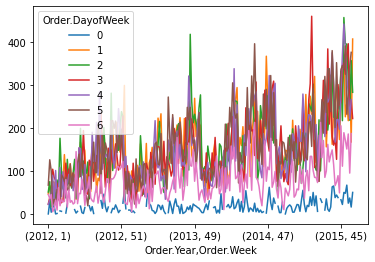

In [24]:
orders_df.groupby(['Order.Year','Order.Week','Order.DayofWeek'])['Quantity'].sum().unstack('Order.DayofWeek').plot()

In [25]:
orders_df.groupby(['Order.Week','Order.DayofWeek'])['Quantity'].sum().head(10)

Order.Week  Order.DayofWeek
1           0                   65
            1                  554
            2                  398
            3                  280
            4                  333
            5                  404
            6                  186
2           0                   66
            1                  387
            2                  297
Name: Quantity, dtype: int64

<AxesSubplot:title={'center':'Aggregated Day of the Week orders'}, xlabel='Order.Week'>

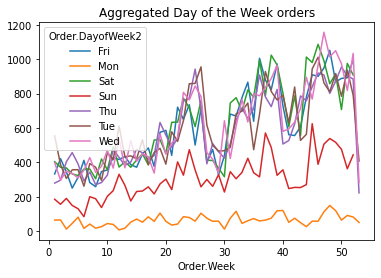

In [26]:
# 0 is Monday and 6 is Sunday
orders_df.groupby(['Order.Week','Order.DayofWeek2'])['Quantity'].sum().unstack('Order.DayofWeek2').plot(title="Aggregated Day of the Week orders")

Observation:
- Sunday and Monday are the lowest for orders. Monday being the weakest.

<AxesSubplot:title={'center':'Weekly orders over 2012-2105'}, xlabel='Order.Year,Order.Week'>

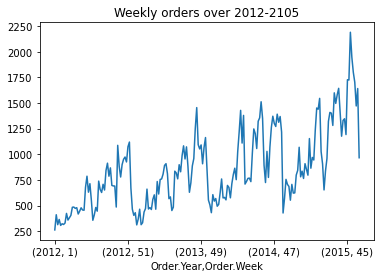

In [28]:
orders_df.groupby(['Order.Year','Order.Week'])['Quantity'].sum().plot(title="Weekly orders over 2012-2105")

Observation:
   - The weekly orders increase from January to December.
   - The weekly orders reach 1000 in 2012 while the reach over 2200 in 2015.
   - The weekly orders per year increase over the years.

<AxesSubplot:title={'center':'Montly order sum over the years'}, xlabel='Order.Year,Order.Month'>

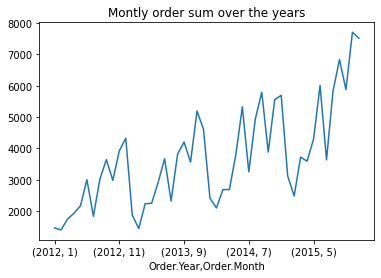

In [30]:

orders_df.groupby(['Order.Year','Order.Month'])['Quantity'].sum().plot(title="Montly order sum over the years")

In [31]:
orders_df.groupby(['Order.Year','Order.Week'])['Quantity'].sum()

Order.Year  Order.Week
2012        1              262
            2              410
            3              313
            4              364
            5              306
                          ... 
2015        49            1800
            50            1703
            51            1471
            52            1641
            53             966
Name: Quantity, Length: 209, dtype: int64

In [32]:
week_df = orders_df.groupby(['Order.Week', 'Order.Year'])['Quantity'].sum().unstack('Order.Year')

<AxesSubplot:xlabel='Order.Week'>

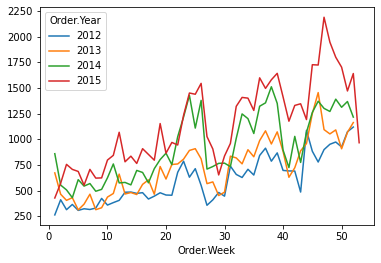

In [33]:
week_df.plot()

Order.Year  2012   2013   2014   2015   mean
Order.Day                                   
1           19.0  120.0   86.0   77.0  75.50
2            1.0   68.0  106.0  118.0  73.25 



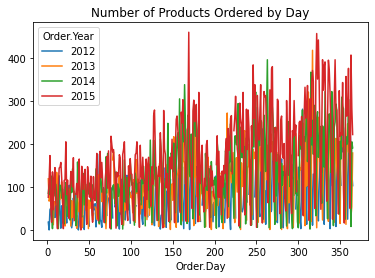

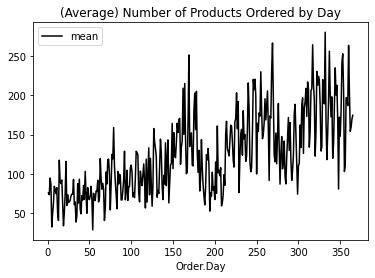

In [36]:
import matplotlib.pyplot as plt
day_df = orders_df.groupby(['Order.Day', 'Order.Year'])['Quantity'].sum().unstack('Order.Year')
years = day_df.columns
day_df["mean"] = day_df.mean(axis=1)
print(day_df.head(2), "\n")
day_df.plot(y=years, title="Number of Products Ordered by Day")
day_df.plot(y="mean", color='k', title="(Average) Number of Products Ordered by Day")
plt.show()

Order.Year   2012   2013   2014   2015   mean
Order.Week                                   
1           262.0  672.0  859.0  427.0  555.0
2           410.0  464.0  553.0  571.0  499.5 



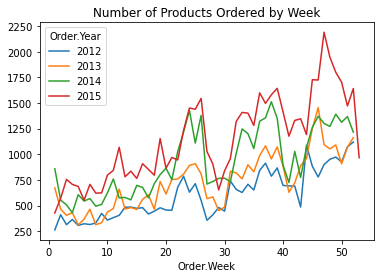

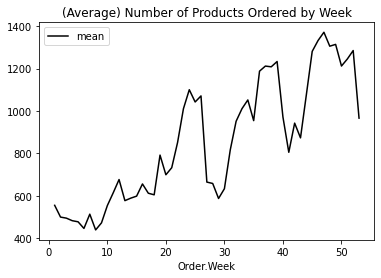

In [37]:
week_df = orders_df.groupby(['Order.Week', 'Order.Year'])['Quantity'].sum().unstack('Order.Year')
years = week_df.columns
week_df["mean"] = week_df.mean(axis=1)
print(week_df.head(2), "\n")
week_df.plot(y=years, title="Number of Products Ordered by Week")
week_df.plot(y="mean", color='k', title="(Average) Number of Products Ordered by Week")
plt.show()

<AxesSubplot:xlabel='Order.Day'>

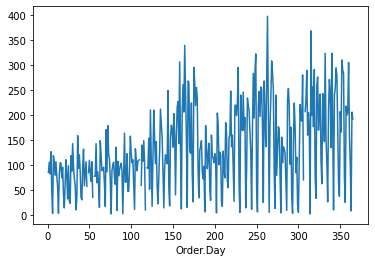

In [38]:
day_df[2014].plot(title="")

<AxesSubplot:xlabel='Order.Day'>

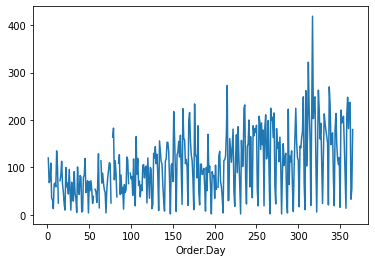

In [39]:
day_df[2013].plot()

Order.Year   2012  2013  2014  2015     mean
Order.Month                                 
1            1463  1874  2413  3122  2218.00
2            1401  1444  2102  2482  1857.25 



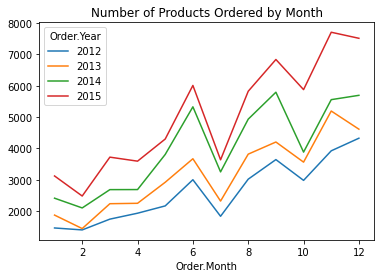

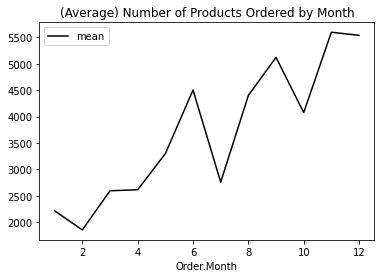

In [40]:
month_df = orders_df.groupby(['Order.Month', 'Order.Year'])['Quantity'].sum().unstack('Order.Year')
years = month_df.columns
month_df["mean"] = month_df.mean(axis=1)
print(month_df.head(2), "\n")
month_df.plot(y=years, title="Number of Products Ordered by Month")
month_df.plot(y="mean", color='k', title="(Average) Number of Products Ordered by Month")
plt.show()

## 2. Seasonal trend for different categories

In [41]:
orders_df.groupby(['Order.Month', 'Order.Year', 'Category'])['Quantity'].sum().unstack('Order.Year').mean(axis=1).unstack('Category')

Category,Furniture,Office Supplies,Technology
Order.Month,,,
1,437.50,1370.00,410.50
2,373.50,1085.00,398.75
3,524.50,1570.75,502.25
4,501.25,1597.75,517.50
5,621.00,2042.50,635.50
6,858.50,2753.00,890.75
7,539.25,1654.50,567.75
8,764.75,2754.75,879.50
9,1027.75,3143.00,949.00


Category     Furniture  Office Supplies  Technology
Order.Month                                        
1               437.50          1370.00      410.50
2               373.50          1085.00      398.75
3               524.50          1570.75      502.25
4               501.25          1597.75      517.50
5               621.00          2042.50      635.50
6               858.50          2753.00      890.75
7               539.25          1654.50      567.75
8               764.75          2754.75      879.50
9              1027.75          3143.00      949.00
10              830.75          2396.25      848.75
11             1117.75          3382.25     1094.75
12             1126.50          3311.25     1099.00


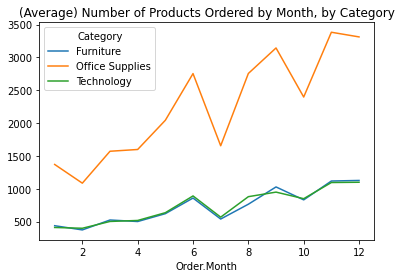

Category     Furniture  Office Supplies  Technology
Order.Month                                        
1             0.388371         0.405056    0.373521
2             0.331558         0.320792    0.362830
3             0.465601         0.464410    0.457006
4             0.444962         0.472393    0.470883
5             0.551265         0.603888    0.578253
6             0.762095         0.813955    0.810510
7             0.478695         0.489171    0.516606
8             0.678873         0.814473    0.800273
9             0.912339         0.929263    0.863512
10            0.737461         0.708478    0.772293
11            0.992233         1.000000    0.996133
12            1.000000         0.979008    1.000000


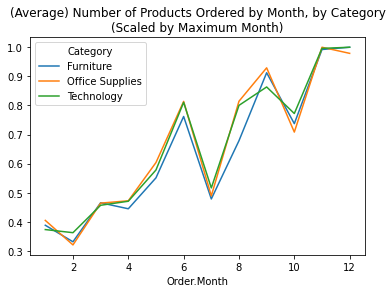

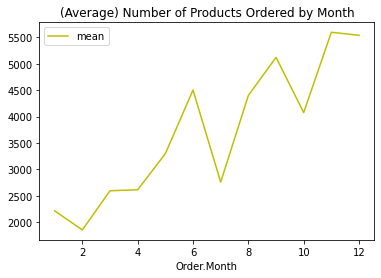

In [43]:
df = orders_df.groupby(['Order.Month', 'Order.Year', 'Category'])['Quantity'].sum().unstack('Order.Year').mean(axis=1).unstack('Category')
#df_scaled = df.apply(lambda x: x / x.iloc[0]) # Scale by the first month
df_scaled = df.apply(lambda x: x / max(x))     # Scale by the maximum month
print(df)
df.plot(title="(Average) Number of Products Ordered by Month, by Category")
plt.show()
print(df_scaled)
df_scaled.plot(title="(Average) Number of Products Ordered by Month, by Category\n(Scaled by Maximum Month)")
# Show general trend for comparison
month_df.plot(y="mean", color='y', title="(Average) Number of Products Ordered by Month")
plt.show()

**Observations:**

* It's easier to see the seasonality trends for the different categories in the scaled version.
* The different categories follow the same seasonality trend, which is the same as the general (average) trend.
* There are clear seasonality trends that are important to know for inventory management.

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?

	2. How many customer returned more than once? more than 5 times?

	3. Which regions are more likely to return orders?

	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [44]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1079 non-null   object
 1   Order ID  1079 non-null   object
 2   Region    1079 non-null   object
dtypes: object(3)
memory usage: 25.4+ KB


In [45]:
returns_df.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [46]:
def clean_returns_dataset(raw_df):
    
    # Clean dataframe copy
    clean_df = raw_df.copy()
    
    # Transform from object to boolean
    clean_df["Returned"] = raw_df["Returned"].replace("Yes", True)
    
    # Rename 'Order ID' to 'Order.ID' to match orders data
    clean_df.rename(columns={'Order ID': 'Order.ID'}, inplace=True)
    
    return clean_df

In [47]:
return_cdf = clean_returns_dataset(returns_df)
print(return_cdf.head(3))
print(orders_df.head(3))

   Returned                  Order.ID        Region
0      True  CA-2012-SA20830140-41210    Central US
1      True  IN-2012-PB19210127-41259  Eastern Asia
2      True  CA-2012-SC20095140-41174    Central US
   Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17  10/18/14   First Class   

    Customer.ID  Customer.Name    Segment  Postal.Code           City  ...  \
0  AB-100151402  Aaron Bergman   Consumer      73120.0  Oklahoma City  ...   
1     JR-162107  Justin Ritter  Corporate          NaN     Wollongong  ...   
2     CR-127307   Craig Reiter   Consumer          NaN       Brisbane  ...   

  Discount  Profit Shipping.Cost Order.Priority Order.Year Order.Month  \
0      0.0   62.15         40.77           High       2014          11   
1      0.1 -288.77        923.63  

### Merging Returns and Orders by Order ID
This only contains orders information about orders that are returned later on.

In [48]:
merged_df = orders_df.merge(return_cdf, on=['Order.ID','Region'], how='inner')

In [54]:
merged_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Year',
       'Order.Month', 'Order.Week', 'Order.Day', 'Order.DayofWeek',
       'Order.DayofWeek2', 'Returned'],
      dtype='object')

<AxesSubplot:title={'center':'Profit lost in USD due returns per year'}, xlabel='Order.Year', ylabel='$'>

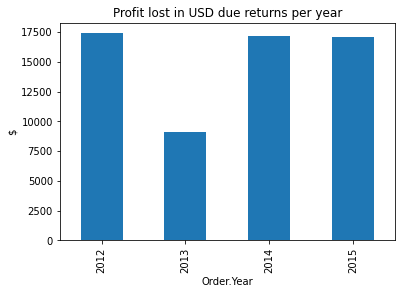

In [62]:
# How much profit did we lose due to returns each year?
merged_df.groupby(['Order.Year'])['Profit'].sum().plot(kind='bar',ylabel="$", title="Profit lost in USD due returns per year")

1     510
2     251
3     154
4      60
5      32
6      20
7      14
8       6
9       2
10      2
11      1
13      1
Name: Returned, dtype: int64


<AxesSubplot:title={'center':'Nr of returns vs Nr of customers'}, ylabel='Number of returns'>

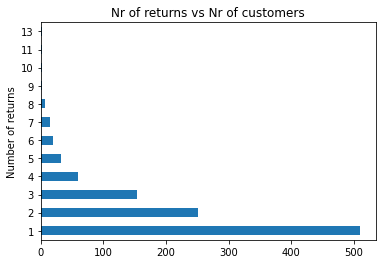

In [64]:
# How many customer returned more than once? more than 5 times?
print(merged_df.groupby(['Customer.ID'])["Returned"].sum().value_counts())
merged_df.groupby(['Customer.ID'])["Returned"].sum().value_counts().plot(ylabel="Nr of Customers", \
                                                                         xlabel="Number of returns",kind='barh',\
                                                                        title="Nr of returns vs Nr of customers")

In [66]:
return_cnts = merged_df.groupby(['Customer.ID'])["Returned"].sum().value_counts()

In [71]:
print(return_cnts.loc[return_cnts.index>1].sum(), "returned more then 1 item")
print(return_cnts.loc[return_cnts.index>5].sum(), "returned more then 1 item")

543 returned more then 1 item
46 returned more then 1 item


### Regions that are the most likely to return orders

There are 24 regions in the returns chart


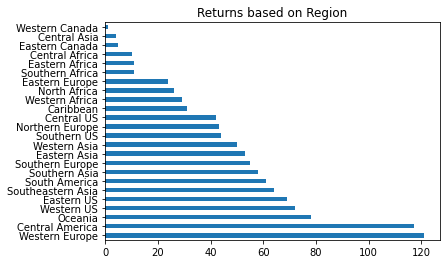

In [52]:
print("There are {} regions in the returns chart".format(return_cdf['Region'].value_counts().count()))
return_cdf['Region'].value_counts().plot(kind='barh', title='Returns based on Region')
returns_per_region = return_cdf['Region'].value_counts()

In [72]:
orders_df.merge(return_cdf, on=['Order.ID','Region'], how='inner')['Region'].value_counts()

Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            71
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Central Asia           9
Name: Region, dtype: int64

In [88]:
print(returns_df.shape[0], "Returns in dataset")
print(orders_df.shape[0], "Orders in dataset")

print("Troughout the years {} of unique customers placed {} unique orders".format(orders_df['Customer.ID'].nunique(),orders_df['Order.ID'].nunique()))


1079 Returns in dataset
51290 Orders in dataset
Troughout the years 17415 of unique customers placed 25728 unique orders


In [80]:
orders_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Year',
       'Order.Month', 'Order.Week', 'Order.Day', 'Order.DayofWeek',
       'Order.DayofWeek2'],
      dtype='object')

In [99]:
orders_by_region = orders_df.groupby('Region')['Region'].count().sort_values(ascending=False)
orders_by_region

Region
Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

In [146]:
returns_by_region = return_cdf.groupby('Region')['Region'].count().sort_values()
returns_by_region = pd.DataFrame(returns_by_region).rename(columns={"Region":"rcount"})
returns_by_region[:10]

,rcount
Region,
Western Canada,1
Central Asia,4
Eastern Canada,5
Central Africa,10
Eastern Africa,11
Southern Africa,11
Eastern Europe,24
North Africa,26
Western Africa,29


In [147]:
orders_by_region = pd.DataFrame(orders_by_region).rename(columns={"Region":"ocount"})
orders_by_region[:10]

,ocount
Region,
Western Europe,5883
Central America,5616
Oceania,3487
Western US,3203
Southeastern Asia,3129
South America,2988
Eastern US,2848
Southern Asia,2655
Western Asia,2440


In [104]:
print(len(orders_by_region))
print(len(returns_by_region))

23
24


In [140]:
m_by_region = orders_by_region.merge(returns_by_region,left_index=True, right_index=True)
m_by_region[:10]


,ocount,rcount
Region,,
Western Europe,5883,121
Central America,5616,117
Oceania,3487,78
Western US,3203,72
Southeastern Asia,3129,64
South America,2988,61
Eastern US,2848,69
Southern Asia,2655,58
Western Asia,2440,50


<AxesSubplot:xlabel='Region'>

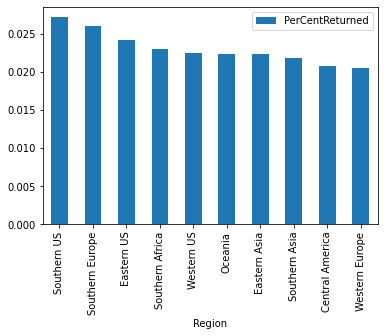

In [145]:
m_by_region['PerCentReturned'] = m_by_region['rcount']/m_by_region['ocount']
m_by_region[['PerCentReturned']].sort_values('PerCentReturned',ascending=False)[:10].plot(kind='bar')

In [117]:
orders_per_region = orders_df['Region'].value_counts()
print("There are {} regions in the orders".format(orders_df['Region'].value_counts().count()))

There are 23 regions in the orders



## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID



### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.

### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.


### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.